<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

![img](aa.png)

## Logistic Regression is one of the techniques use for classification

![img](bb.png)

### Binary and Multi class

buy insurance or not based on age

![img](cc.png)

**in linear regression**

![img](ee.png)

**in logistic**


![img](gg.png)



![img](1.png)

![img](2.png)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


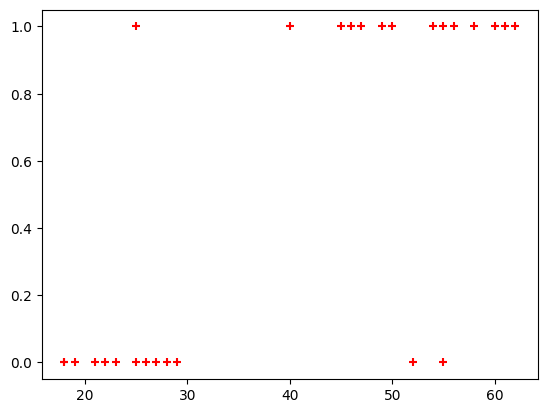

In [3]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [6]:
X_test

,age
4,46
12,27
11,28
0,22
9,61
10,18


In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [8]:
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
X_test

,age
4,46
12,27
11,28
0,22
9,61
10,18


In [10]:
y_predicted = model.predict(X_test)

In [11]:
model.predict_proba(X_test)

array([[0.28451011, 0.71548989],
       [0.77546138, 0.22453862],
       [0.75503367, 0.24496633],
       [0.85915084, 0.14084916],
       [0.067312  , 0.932688  ],
       [0.90579422, 0.09420578]])

In [12]:
model.score(X_test,y_test)

1.0

In [13]:
y_predicted

array([1, 0, 0, 0, 1, 0], dtype=int64)

In [14]:
X_test

,age
4,46
12,27
11,28
0,22
9,61
10,18


**model.coef_ indicates value of m in y=m*x + b equation**

In [15]:
model.coef_

array([[0.1137689]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [16]:
model.intercept_

array([-4.3111709])

**Lets defined sigmoid function now and do the math with hand**

In [17]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [18]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [19]:
age = 35
prediction_function(age)

0.4850044983805899

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**

In [20]:
age = 43
prediction_function(age)

0.568565299077705

**0.485 is more than 0.5 which means person with 43 will buy the insurance**

# Multiclass logistic

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [22]:
digits = load_digits()

In [23]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

to check the first image array value

In [30]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

**Print first 5 images using images parameter**

<Figure size 640x480 with 0 Axes>

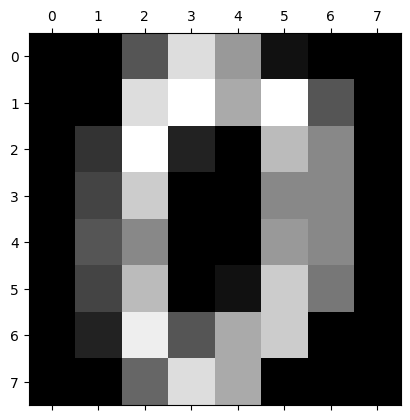

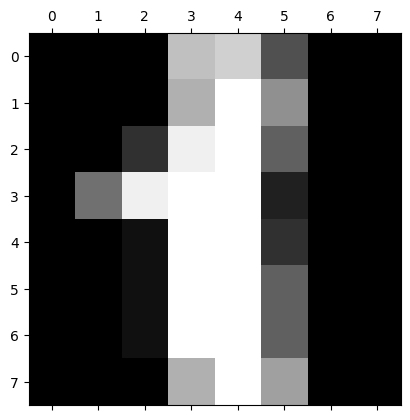

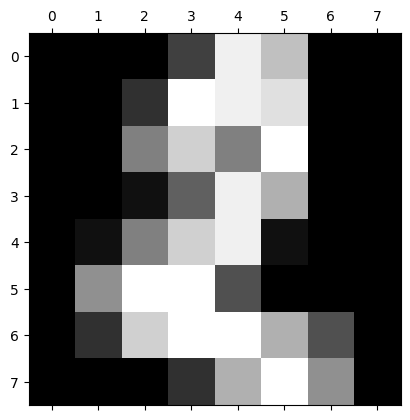

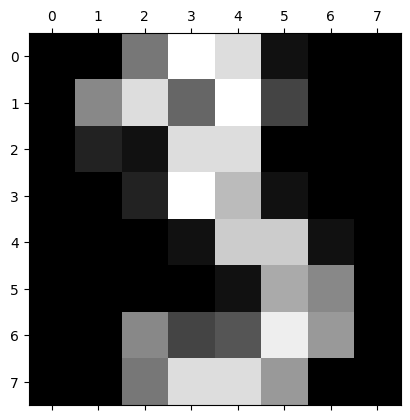

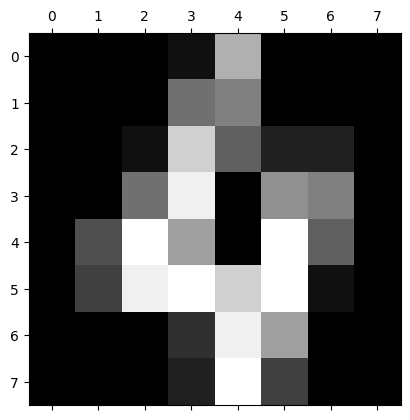

In [32]:
plt.gray()

for i in range(5):
    plt.matshow(digits.images[i])

**To see the target values**

In [33]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [38]:
X = digits.data
y= digits.target

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [40]:
print(len(X_train))
print(len(X_test))

1437
360


In [41]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
model.score(X_test,y_test)

0.9722222222222222

<Figure size 640x480 with 0 Axes>

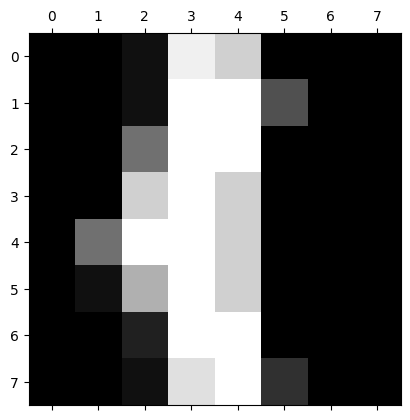

In [43]:
plt.gray()

plt.matshow(digits.images[99])

In [44]:
digits.target[99]

1

In [46]:
model.predict([digits.data[99]])

array([1])

### confusiom matrix

In [47]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

cm= confusion_matrix(y_test,y_pred)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 38,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 34,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 34,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 43,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 27]], dtype=int64)

Text(50.722222222222214, 0.5, 'truth')

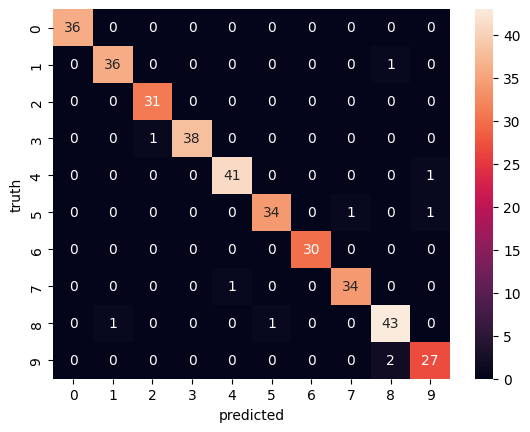

In [48]:
import seaborn as sn

sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

![img](3.png)

![img](4.png)